## Importing Libraries

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt  

## Importing the CSV file

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\ASSIGNMENT_4\ASSIGNMENT_4\Multiple CSV\3.concertriccir2.csv",header=None) 
df.head() 

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [4]:
df[2].value_counts()  

0.0    250
1.0    250
Name: 2, dtype: int64

## Seperating the Input and Output Features

In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int) 

In [6]:
x.head()  

,0,1
0,0.700335,-0.247068
1,-3.950019,2.740080
2,0.150222,-2.157638
3,-1.672050,-0.941519
4,2.560483,-1.846577


In [7]:
y.head()  

0    0
1    1
2    1
3    1
4    1
Name: 2, dtype: int32

## Split the data into train and test 

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [9]:
x_train.shape  

(450, 2)

In [10]:
x_test.shape  

(50, 2)

### Standardising input features 

In [11]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)  

### Build the Logical Structure

In [12]:
model=Sequential()
model.add(Dense(18,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(10,activation="relu",kernel_regularizer=L1(0.001),bias_regularizer=L1(0.001)))
model.add(Dense(1,activation="sigmoid"))  

In [13]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                54        
                                                                 
 dense_1 (Dense)             (None, 16)                304       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 539 (2.11 KB)
Trainable params: 539 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### compiling the model 

In [14]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=300,validation_split=0.1)  

Epoch 1/300
41/41 [==============================] - 2s 12ms/step - loss: 0.8105 - accuracy: 0.4370 - val_loss: 0.8108 - val_accuracy: 0.4000
Epoch 2/300
41/41 [==============================] - 0s 4ms/step - loss: 0.8091 - accuracy: 0.4247 - val_loss: 0.8091 - val_accuracy: 0.4444
Epoch 3/300
41/41 [==============================] - 0s 4ms/step - loss: 0.8075 - accuracy: 0.4074 - val_loss: 0.8078 - val_accuracy: 0.4222
Epoch 4/300
41/41 [==============================] - 0s 4ms/step - loss: 0.8061 - accuracy: 0.4296 - val_loss: 0.8064 - val_accuracy: 0.4667
Epoch 5/300
41/41 [==============================] - 0s 4ms/step - loss: 0.8049 - accuracy: 0.4296 - val_loss: 0.8049 - val_accuracy: 0.5111
Epoch 6/300
41/41 [==============================] - 0s 4ms/step - loss: 0.8037 - accuracy: 0.4346 - val_loss: 0.8038 - val_accuracy: 0.4444
Epoch 7/300
41/41 [==============================] - 0s 4ms/step - loss: 0.8024 - accuracy: 0.4469 - val_loss: 0.8023 - val_accuracy: 0.4889
Epoch 8/300


Epoch 59/300
41/41 [==============================] - 0s 5ms/step - loss: 0.7628 - accuracy: 0.7556 - val_loss: 0.7626 - val_accuracy: 0.6889
Epoch 60/300
41/41 [==============================] - 0s 5ms/step - loss: 0.7617 - accuracy: 0.7457 - val_loss: 0.7612 - val_accuracy: 0.7111
Epoch 61/300
41/41 [==============================] - 0s 4ms/step - loss: 0.7605 - accuracy: 0.7506 - val_loss: 0.7599 - val_accuracy: 0.7111
Epoch 62/300
41/41 [==============================] - 0s 4ms/step - loss: 0.7593 - accuracy: 0.7457 - val_loss: 0.7585 - val_accuracy: 0.7111
Epoch 63/300
41/41 [==============================] - 0s 5ms/step - loss: 0.7581 - accuracy: 0.7580 - val_loss: 0.7569 - val_accuracy: 0.7111
Epoch 64/300
41/41 [==============================] - 0s 4ms/step - loss: 0.7568 - accuracy: 0.7531 - val_loss: 0.7559 - val_accuracy: 0.7111
Epoch 65/300
41/41 [==============================] - 0s 4ms/step - loss: 0.7554 - accuracy: 0.7679 - val_loss: 0.7545 - val_accuracy: 0.7111
Epoch 

41/41 [==============================] - 0s 4ms/step - loss: 0.6132 - accuracy: 0.8420 - val_loss: 0.6160 - val_accuracy: 0.8444
Epoch 117/300
41/41 [==============================] - 0s 4ms/step - loss: 0.6095 - accuracy: 0.8272 - val_loss: 0.6140 - val_accuracy: 0.8222
Epoch 118/300
41/41 [==============================] - 0s 4ms/step - loss: 0.6034 - accuracy: 0.8395 - val_loss: 0.6063 - val_accuracy: 0.8444
Epoch 119/300
41/41 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.8296 - val_loss: 0.6010 - val_accuracy: 0.8667
Epoch 120/300
41/41 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.8444 - val_loss: 0.5957 - val_accuracy: 0.8444
Epoch 121/300
41/41 [==============================] - 0s 4ms/step - loss: 0.5902 - accuracy: 0.8469 - val_loss: 0.5896 - val_accuracy: 0.8222
Epoch 122/300
41/41 [==============================] - 0s 4ms/step - loss: 0.5871 - accuracy: 0.8519 - val_loss: 0.5834 - val_accuracy: 0.8889
Epoch 123/300

41/41 [==============================] - 0s 4ms/step - loss: 0.4228 - accuracy: 0.8914 - val_loss: 0.4134 - val_accuracy: 0.8889
Epoch 174/300
41/41 [==============================] - 0s 4ms/step - loss: 0.4154 - accuracy: 0.8840 - val_loss: 0.3855 - val_accuracy: 0.9111
Epoch 175/300
41/41 [==============================] - 0s 4ms/step - loss: 0.4117 - accuracy: 0.8790 - val_loss: 0.4262 - val_accuracy: 0.8889
Epoch 176/300
41/41 [==============================] - 0s 4ms/step - loss: 0.4121 - accuracy: 0.8914 - val_loss: 0.3833 - val_accuracy: 0.9111
Epoch 177/300
41/41 [==============================] - 0s 4ms/step - loss: 0.4135 - accuracy: 0.8938 - val_loss: 0.3843 - val_accuracy: 0.9111
Epoch 178/300
41/41 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8790 - val_loss: 0.4184 - val_accuracy: 0.8889
Epoch 179/300
41/41 [==============================] - 0s 4ms/step - loss: 0.4069 - accuracy: 0.8840 - val_loss: 0.3649 - val_accuracy: 0.9333
Epoch 180/300

41/41 [==============================] - 0s 6ms/step - loss: 0.3628 - accuracy: 0.8938 - val_loss: 0.3263 - val_accuracy: 0.9111
Epoch 231/300
41/41 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.8840 - val_loss: 0.2970 - val_accuracy: 0.9556
Epoch 232/300
41/41 [==============================] - 0s 6ms/step - loss: 0.3636 - accuracy: 0.8938 - val_loss: 0.3351 - val_accuracy: 0.9111
Epoch 233/300
41/41 [==============================] - 0s 5ms/step - loss: 0.3615 - accuracy: 0.8988 - val_loss: 0.3834 - val_accuracy: 0.8889
Epoch 234/300
41/41 [==============================] - 0s 4ms/step - loss: 0.3617 - accuracy: 0.8963 - val_loss: 0.3273 - val_accuracy: 0.9111
Epoch 235/300
41/41 [==============================] - 0s 4ms/step - loss: 0.3610 - accuracy: 0.9012 - val_loss: 0.3523 - val_accuracy: 0.8889
Epoch 236/300
41/41 [==============================] - 0s 4ms/step - loss: 0.3613 - accuracy: 0.8914 - val_loss: 0.2936 - val_accuracy: 0.9333
Epoch 237/300

41/41 [==============================] - 0s 4ms/step - loss: 0.3444 - accuracy: 0.8938 - val_loss: 0.2936 - val_accuracy: 0.9333
Epoch 288/300
41/41 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8963 - val_loss: 0.3386 - val_accuracy: 0.9111
Epoch 289/300
41/41 [==============================] - 0s 4ms/step - loss: 0.3307 - accuracy: 0.9062 - val_loss: 0.3144 - val_accuracy: 0.9111
Epoch 290/300
41/41 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.8914 - val_loss: 0.3981 - val_accuracy: 0.8889
Epoch 291/300
41/41 [==============================] - 0s 4ms/step - loss: 0.3317 - accuracy: 0.9012 - val_loss: 0.2951 - val_accuracy: 0.9556
Epoch 292/300
41/41 [==============================] - 0s 4ms/step - loss: 0.3330 - accuracy: 0.9185 - val_loss: 0.2970 - val_accuracy: 0.9111
Epoch 293/300
41/41 [==============================] - 0s 4ms/step - loss: 0.3365 - accuracy: 0.9012 - val_loss: 0.2991 - val_accuracy: 0.9111
Epoch 294/300

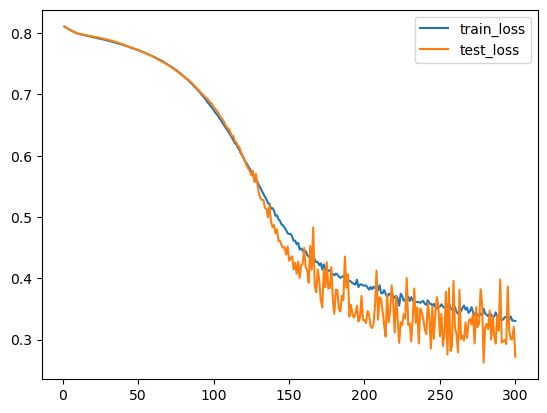

In [15]:
plt.plot(range(1,301),history.history["loss"],label="train_loss")
plt.plot(range(1,301),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model 

In [16]:
predicted=model.predict(x_test) 
predicted  

2/2 [==============================] - 0s 5ms/step


array([[2.3833074e-04],
       [2.4597545e-03],
       [3.0969158e-01],
       [1.7604256e-02],
       [9.9891168e-01],
       [1.1336533e-04],
       [9.8477322e-01],
       [2.8047647e-02],
       [1.3355721e-02],
       [8.7293071e-01],
       [5.6019783e-01],
       [1.5054084e-01],
       [9.8534220e-01],
       [9.9028254e-01],
       [9.8749733e-01],
       [2.1743868e-04],
       [6.4290591e-02],
       [3.0457485e-02],
       [1.0770039e-02],
       [2.9992047e-01],
       [9.5669168e-01],
       [3.2330904e-02],
       [2.9234178e-03],
       [2.9215364e-02],
       [3.2521903e-08],
       [9.8969334e-01],
       [4.4200844e-01],
       [7.3368717e-03],
       [5.8949400e-02],
       [5.5453467e-01],
       [7.4561000e-01],
       [5.3998047e-01],
       [2.8791398e-01],
       [7.0369822e-01],
       [3.5707874e-03],
       [2.9504582e-01],
       [9.8510069e-01],
       [1.3571204e-01],
       [9.2976447e-03],
       [7.0134693e-01],
       [1.8193215e-01],
       [7.113745

In [17]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]])

## Evaluating the model 

0.86


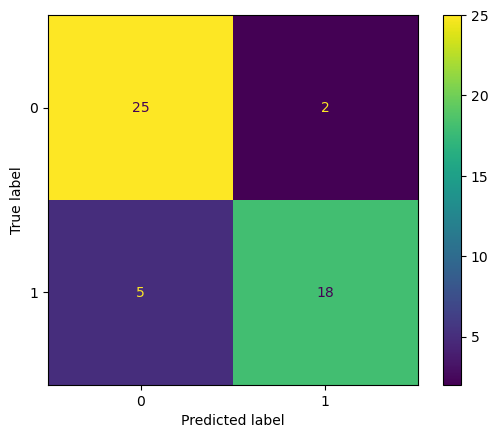

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

## PLOTING THE DECISION SURFACE 

In [19]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

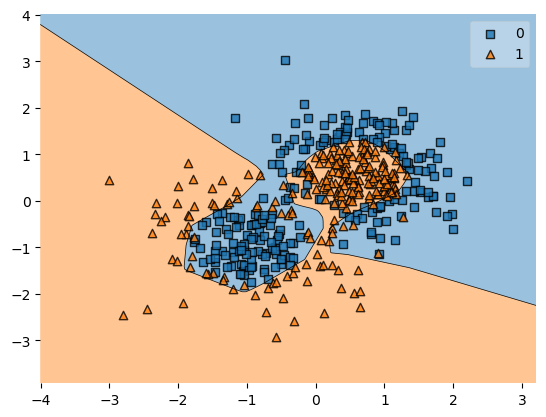

In [20]:
plot_decision_regions(x_train,y_train.values,clf=model)  

9600/9600 [==============================] - 21s 2ms/step


<AxesSubplot:>

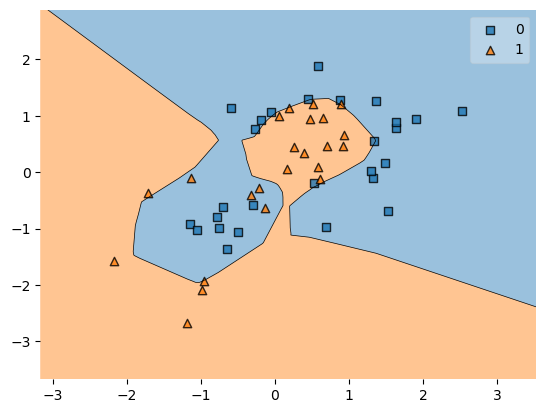

In [21]:
plot_decision_regions(x_test,y_test.values,clf=model) 

## Conclusions:

###### This model achieves an accuracy of 90%. The model architecture consists of 3 hidden layers, Below are the mentioned Specifications

- 1st HL:-18 neurons with the ReLU activation functions and L2 regularizer with a strength of 0.001.
- 2nd HL:-16 neurons with the ReLU activation function and L2 regularizer with a strength of 0.001.
- 3rd HL:-10 neurons with the ReLU activation function and L2 regularizer with a strength of 0.001.

###### output layer :- sigmoid activation function.

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 with learning rate of 0.01.
- The model was trained for 300 epochs.
 